Task 3 Performance Result:
Accuracy: 0.2452

Classification Report:

               precision    recall  f1-score   support

     American       0.25      0.22      0.23        50
        Asian       0.08      0.06      0.06        18
          BBQ       0.00      0.00      0.00         2
       Bakery       0.13      0.08      0.10       127
      Bengali       0.00      0.00      0.00         4
    Beverages       0.11      0.06      0.07        18
      Biryani       0.00      0.00      0.00        24
    Brazilian       0.67      0.67      0.67         6
    Breakfast       0.00      0.00      0.00         2
      British       0.00      0.00      0.00         4
       Burger       0.00      0.00      0.00        18
         Cafe       0.12      0.13      0.12       117
      Chinese       0.06      0.03      0.04       172
  Continental       0.00      0.00      0.00        45
     Desserts       0.15      0.06      0.09        32
     European       0.08      0.06      0.07      

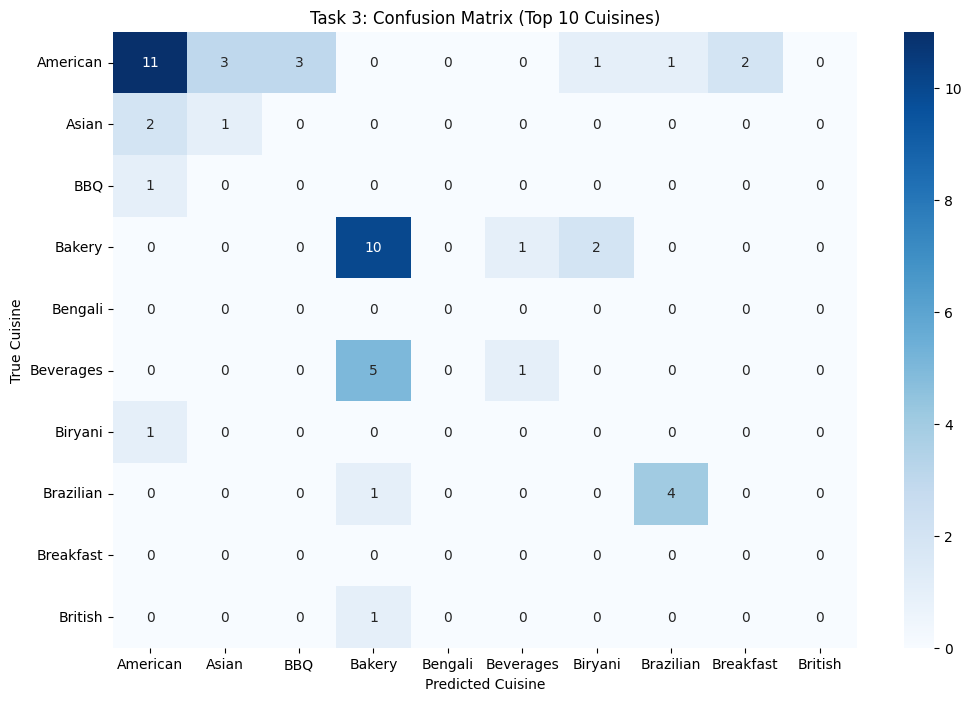

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('Dataset .csv')
df.columns = df.columns.str.strip()  # Fixes accidental spaces in column names

# Step 2: Preprocess the data
target_column = 'Cuisines'
df = df.dropna(subset=[target_column])  # Remove missing targets

# Logic Fix: Simplify Cuisines to the primary one to improve accuracy
df[target_column] = df[target_column].str.split(',').str[0]

# Logic Fix: Filter out cuisines with fewer than 10 entries to avoid splitting errors
cuisine_counts = df[target_column].value_counts()
df = df[df[target_column].isin(cuisine_counts[cuisine_counts >= 10].index)]

# Feature Selection: Use the most impactful numeric columns
features = ['Aggregate rating', 'Price range', 'Votes', 'Country Code']
X = df[features]
y = df[target_column]

# Encode the target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 3: Split into training and testing sets (80% train, 20% test)
# Removed 'stratify' to ensure rare classes don't break the code
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 4: Select and train the best classification algorithm
# Random Forest is the best choice for this type of restaurant data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Evaluate on testing data
y_pred = rf.predict(X_test)

# Print Metrics
print(f"Task 3 Performance Result:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n")
# Using only the first 10 classes for the report to keep the output clean
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Step 6: Visualization - Confusion Matrix
# We show a small version of the matrix for the top 10 cuisines
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm[:10, :10], annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_[:10], 
            yticklabels=label_encoder.classes_[:10])
plt.title('Task 3: Confusion Matrix (Top 10 Cuisines)')
plt.ylabel('True Cuisine')
plt.xlabel('Predicted Cuisine')
plt.show()